# Projeto Final - Machine Learning:
#### Integrantes: 
    - Natália Queiroz Menezes Carreras
    - Willian Kenzo Asanuma Lee


### Introdução:

O machine learning se tornou uma ótima maneira para as empresas obterem insights valiosos sobre o comportamento do consumidor, fazendo previsões sobre as vendas com base no momento do ano, na localização da loja e nas informações pessoais sobre seus clientes, como idade e gênero. Além disso, ao obter esses insights valiosos, as empresas serão capazes de criar e melhorar estratégias para otimizar seus lucros e despesas em todas as áreas de seus negócios. Levando isso em consideração, criamos um modelo capaz de prever quanto uma pessoa vai gastar com base em todas as informações coletadas.


Para iniciar o treinamento do modelo, escolhemos um conjunto de dados chamado "Customer Shopping Dataset - Retail Sales Data" [1], que analisa o Mercado de Istambul. O conjunto de dados inclui número de fatura, ID do cliente, idade, gênero, método de pagamento, categoria do produto, quantidade, preço, data do pedido e localização do shopping em 10 shoppings diferentes entre 2021 e 2023.

#### Database: https://www.kaggle.com/datasets/mehmettahiraslan/customer-shopping-dataset

#### Bibliotecas necessárias:

In [506]:
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
import numpy as np
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error


#### Importando o Dataset:

In [507]:
filename = pathlib.Path.cwd()/'customer_shopping_data.csv'
data = pd.read_csv(filename)

In [508]:
data

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


Atributos: 

* invoice_no: código dado para cada operação realizada

* customer_id: código dado para cada comprador 

* gener: gênero de cada usuário

* age: idade de cada usuário

* category: categoria da compra que realizou

* quantity: quantidade de cada produto comprado

* price: preço por unidade, em TL(turkish liras)

* payment_method: método de pagamento

* invoice_date: o dia que a transação aconteceu

* shopping_mall: local da compra

#### Analisando o dataset:

In [509]:
data.isnull().sum()


invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

É importante checar se existe dados incompletos, o dataset que estamos utilizando está completo

In [510]:
## criando coluno pagamento total
data['Total_payment/TL'] = (data['quantity'] * data['price'])

Analisando as categorias de nosso dataset, notamos que não existia o custo total que cada cliente gastava, apenas por unidade. É uma informação importante que precisamos utilizar.

In [511]:
data

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,Total_payment/TL
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,242.40
...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon,293.25
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul,20.92
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity,20.92
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park,16800.00


In [512]:
data['invoice_date'] = pd.to_datetime(data['invoice_date'], dayfirst= True)
data['Day'] = data['invoice_date'].dt.day_name()
data['Month'] = data['invoice_date'].dt.month_name()
data['Year'] = data['invoice_date'].dt.year
data['MonthNo'] = data['invoice_date'].dt.month

Outra coisa que precisamos fazer é transformar os valores unitários das idades em faixas para conseguirmos analisar se cada range de idade faz diferença o quanto gasta

In [513]:
print("idade minima: ", data['age'].min())
print("idade maxima: ", data['age'].max())

idade minima:  18
idade maxima:  69


In [514]:
def age_group_(age):
    if age <= 30:
        age_group = '18-30'
    elif age <= 42:
        age_group = '31-42'
    elif age <= 55:
        age_group = '43-55'
    else:
        age_group = '55+'
    return age_group

In [515]:
data['age_group'] = data['age'].apply(age_group_)

In [516]:
data['age_group'].groupby(data['age_group']).count()


age_group
18-30    25024
31-42    23050
43-55    24796
55+      26587
Name: age_group, dtype: int64

<AxesSubplot: xlabel='age_group', ylabel='Count'>

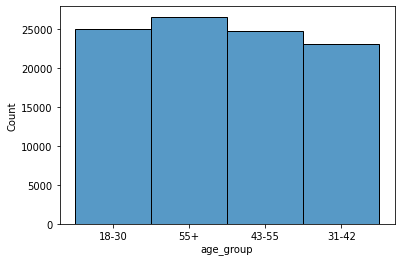

In [517]:
sns.histplot(data['age_group'])

Podemos notar que a diferença de compras por idades não é muito grande, o que é estranho de se notar, pensando que pessoas mais jovens costumam comprar coisas mais online, entretanto como os dados utilizando são entre 2020 e 2022, talvez a pandemia tenha pesado nessa igualdade de compras

Também é interessante separarmos dias de semana e fim de semana para checarmos se existe diferença quanto cada consumidor gasta.


In [518]:
data['dia_de_semana'] = data['Day'].apply(lambda x: 1 if x in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'] else 0)

In [519]:
data['dia_de_semana'].groupby(data['dia_de_semana']).count()

dia_de_semana
0    28261
1    71196
Name: dia_de_semana, dtype: int64

Nota-se que acontecem mais compras durante a semana, talvez um motivo seja a quantidade de dias, mas é importante analisar se o perfil de compras muda durante a semana e o fim de semana, talvez compras maiores sejam mais frequentes durante o fim de semana quando pessoas tem mais tempo livre ou se durante a semana o gasto é majoritamente de comida, como almoço e janta por causa do trabalho

In [520]:
semana = data.loc[data['dia_de_semana'] == 1]
fim_de_semana =  data.loc[data['dia_de_semana'] == 0]

In [521]:
mean_payment_semana = semana['Total_payment/TL'].mean()
mean_payment_fim_de_semana = fim_de_semana['Total_payment/TL'].mean()
diferenca_gastos = mean_payment_semana - mean_payment_fim_de_semana

print('Média de pagamento durante a semana: ', mean_payment_semana)
print('Média de pagamento durante o fim de semana: ', mean_payment_fim_de_semana)
print('Diferença de gastos: ', diferenca_gastos)


Média de pagamento durante a semana:  2537.177298162818
Média de pagamento durante o fim de semana:  2507.6578794097873
Diferença de gastos:  29.51941875303055


Nota-se que a média de gastos é basicamente a mesma, com uma diferença de apenas 29.5 liras o que é aproximadamente 6 reais. Com isso iremos assumir que não existe real diferença entre gastos durante a semana e fim de semana

##### Category:

In [522]:
data['category'] = data['category'].astype('category')
data['category'].value_counts()

Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4996
Books               4981
Name: category, dtype: int64

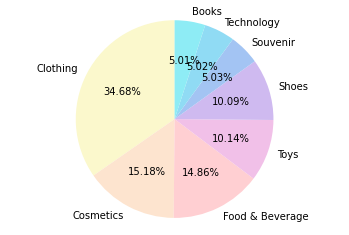

In [523]:
labels = ['Clothing','Cosmetics','Food & Beverage','Toys','Shoes','Souvenir','Technology','Books']
sizes = [data['category'].value_counts()[0],data['category'].value_counts()[1],data['category'].value_counts()[2],data['category'].value_counts()[3],data['category'].value_counts()[4],data['category'].value_counts()[5],data['category'].value_counts()[6],data['category'].value_counts()[7]]
colors=['#fbf8cc','#fde4cf','#ffcfd2','#f1c0e8','#cfbaf0','#a3c4f3','#90dbf4','#8eecf5','#98f5e1','#b9fbc0']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.2f%%',
        startangle=90, colors=colors)
ax1.axis('equal')
plt.show()

<AxesSubplot: xlabel='category'>

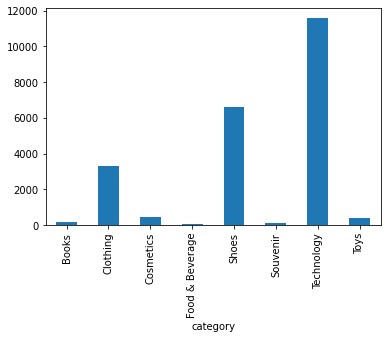

In [524]:
category_mean = data.groupby('category')['Total_payment/TL'].mean()
category_mean.plot(kind='bar')


Nota-se que o preço médio gasto por categoria bem diferente da quantidade de compras de cada categoria, com tecnologia e sapatos tendo um ticket médio bem maior que comparado com os demais.

<AxesSubplot: xlabel='category'>

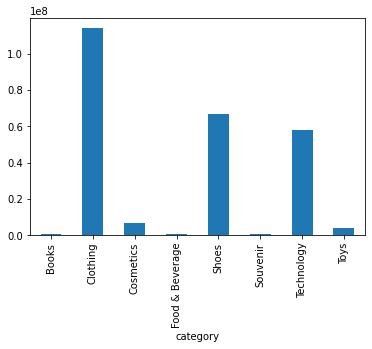

In [525]:
total_revenue_category = data.groupby('category')['Total_payment/TL'].sum()

total_revenue_category.plot(kind='bar')


Analisando os gráficos acima, é importante notar que mesmo que cada pessoa gaste menos por compra em roupas, o total gasto em roupas é o maior de todos, com quase o dobro de diferença para o segundo colocado que seria tênios. Outra coisa importante é que pelo ticket médio expressivo de tênis e tecnologia, mesmo eles possuindo, respectivamente 10.09% e 5.02% do volume de vental eles ainda tem um lucro maior que as outras categorias com maior volume.

##### Gender:

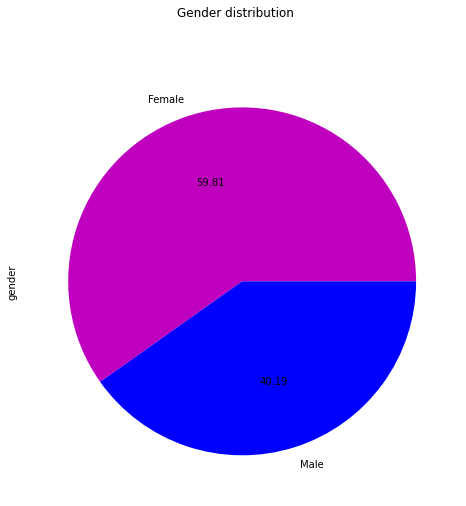

In [526]:
data['gender'].value_counts().plot(kind='pie', subplots=True, autopct='%1.2f', figsize=(8,8), title='Gender distribution', colors = ['m', 'blue'])
plt.show()

In [527]:
homem = data.loc[data['gender'] == 'Male']
mulher =  data.loc[data['gender'] == 'Female']

mean_payment_homem = homem['Total_payment/TL'].mean()
mean_payment_mulher = mulher['Total_payment/TL'].mean()
diferenca_gastos = abs(mean_payment_mulher - mean_payment_homem)

print('Média de pagamento dos homens: ', mean_payment_homem)
print('Média de pagamento das mulheres: ', mean_payment_mulher)
print('Diferença de gastos: ', diferenca_gastos)

Média de pagamento dos homens:  2534.0502371482175
Média de pagamento das mulheres:  2525.2536232809925
Diferença de gastos:  8.796613867225005


Mesmo com a maioria das compras sendo realizadas por mulheres, com quase 60% das vendas, o gasto médio de cada gênero é igual.

In [528]:
gasto_categoria_homem = homem.groupby('category')['Total_payment/TL'].mean()
gasto_categoria_mulher = mulher.groupby('category')['Total_payment/TL'].mean()

gastos_categoria = pd.concat([gasto_categoria_homem, gasto_categoria_mulher], axis=1)
gastos_categoria.columns = ['Homem', 'Mulher']
gastos_categoria['diff_spent'] = gastos_categoria['Homem'] - gastos_categoria['Mulher']



In [529]:
gastos_categoria

,Homem,Mulher,diff_spent
category,,,
Books,166.379855,168.380833,-2.000977
Clothing,3306.475999,3304.846775,1.629223
Cosmetics,452.312985,448.376245,3.936740
Food & Beverage,57.637718,57.396933,0.240784
Shoes,6670.342801,6607.200821,63.141979
Souvenir,127.627371,126.903281,0.724090
Technology,11509.875931,11630.308621,-120.432691
Toys,390.899590,397.049479,-6.149889


Nota-se que a diferença de gastos médios dos gêneros é quase irrelevante, sendo assim iremos considerar que o gênero não faz realmente diferença com quanto cada pessoa irá gastar em um shopping.

### Payment method:

In [530]:
data['payment_method'] = data['payment_method'].astype('category')
data['payment_method'].value_counts()

Cash           44447
Credit Card    34931
Debit Card     20079
Name: payment_method, dtype: int64

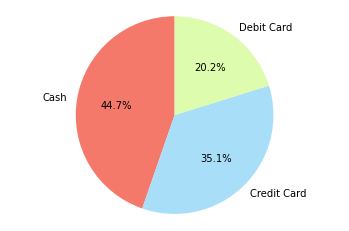

In [531]:
labels = 'Cash', 'Credit Card', 'Debit Card'
sizes = [data['payment_method'].value_counts()[0],data['payment_method'].value_counts()[1],data['payment_method'].value_counts()[2]]
colors = ['#F4796B','#A9DEF9','#DDFCAD']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        startangle=90, colors=colors)
ax1.axis('equal')
plt.show()

array([<AxesSubplot: ylabel='payment_method'>], dtype=object)

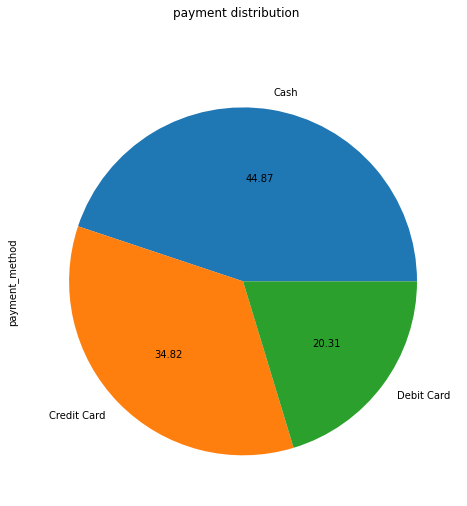

In [532]:
homem['payment_method'].value_counts().plot(kind='pie', subplots=True, autopct='%1.2f', figsize=(8,8), title='payment distribution')


array([<AxesSubplot: ylabel='payment_method'>], dtype=object)

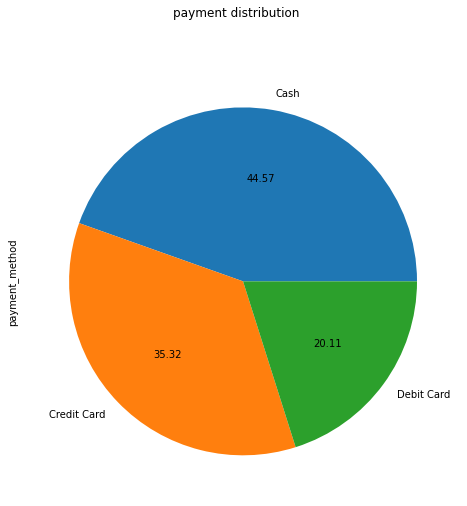

In [533]:
mulher['payment_method'].value_counts().plot(kind='pie', subplots=True, autopct='%1.2f', figsize=(8,8), title='payment distribution')

A diferença de pagamentos por gêneros também é irrelevante pelo mostrado nos gráficos acima.

### Malls

In [534]:
data['shopping_mall'] = data['shopping_mall'].astype('category')
data['shopping_mall'].value_counts()

Mall of Istanbul     19943
Kanyon               19823
Metrocity            15011
Metropol AVM         10161
Istinye Park          9781
Zorlu Center          5075
Cevahir AVM           4991
Forum Istanbul        4947
Viaport Outlet        4914
Emaar Square Mall     4811
Name: shopping_mall, dtype: int64

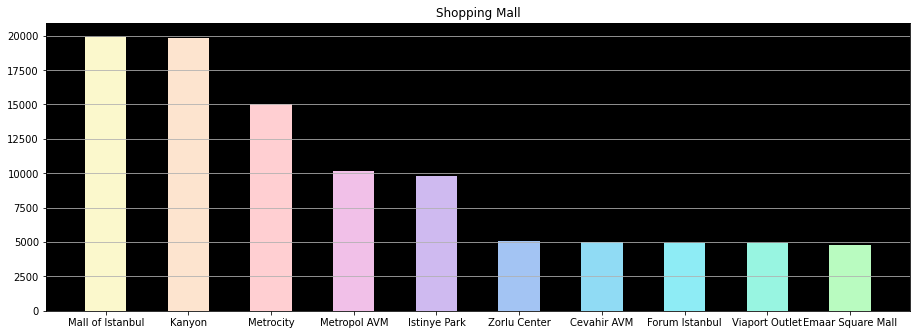

In [535]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
colors=['#fbf8cc','#fde4cf','#ffcfd2','#f1c0e8','#cfbaf0','#a3c4f3','#90dbf4','#8eecf5','#98f5e1','#b9fbc0']
titles = ['Mall of Istanbul', 'Kanyon','Metrocity','Metropol AVM','Istinye Park','Zorlu Center','Cevahir AVM','Forum Istanbul','Viaport Outlet','Emaar Square Mall']
qnt = [data['shopping_mall'].value_counts()[0],data['shopping_mall'].value_counts()[1],data['shopping_mall'].value_counts()[2],data['shopping_mall'].value_counts()[3],data['shopping_mall'].value_counts()[4],data['shopping_mall'].value_counts()[5],data['shopping_mall'].value_counts()[6],data['shopping_mall'].value_counts()[7],data['shopping_mall'].value_counts()[8],data['shopping_mall'].value_counts()[9]]
ax.bar(titles,qnt, color=colors, width=0.5)
ax.set_facecolor("black")
plt.grid(axis = 'y')
plt.title('Shopping Mall')
plt.show()

##### Date:

In [536]:
data_date = pd.read_csv(filename)

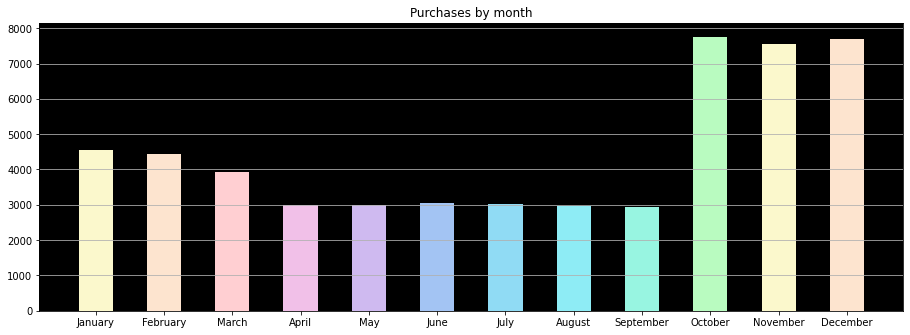

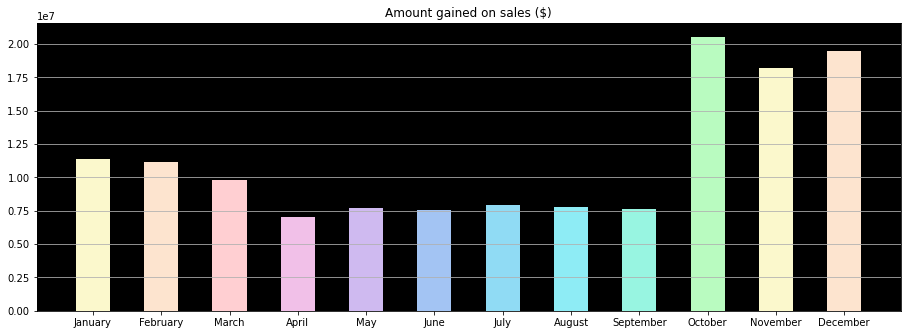

In [537]:
data_date['quantity'] = data_date['quantity'].astype('category')
data_date['price'] = data_date['price'].astype('category')

january,february,march,april,may,june,july,august,september,october,november,december = 0,0,0,0,0,0,0,0,0,0,0,0
januaryAmount,februaryAmount,marchAmount,aprilAmount,mayAmount,juneAmount,julyAmount,augustAmount,septemberAmount,octoberAmount,novemberAmount,decemberAmount = 0,0,0,0,0,0,0,0,0,0,0,0
for i in range (len(data_date)):
    dado = data_date['invoice_date'].get(i)
    dado = dado.split("/")
    if dado[1] == '1':
        januaryAmount += data_date['price'].get(i)*data_date['quantity'].get(i)
        january +=1
    elif dado[1] == '2':
        februaryAmount += data_date['price'].get(i)*data_date['quantity'].get(i)
        february += 1
    elif dado[1] == '3':
        marchAmount += data_date['price'].get(i)*data_date['quantity'].get(i)
        march +=1
    elif dado[1] == '4':
        aprilAmount += data_date['price'].get(i)*data_date['quantity'].get(i)
        april +=1
    elif dado[1] == '5':
        mayAmount += data_date['price'].get(i)*data_date['quantity'].get(i)
        may +=1
    elif dado[1] == '6':
        juneAmount += data_date['price'].get(i)*data_date['quantity'].get(i)
        june +=1
    elif dado[1] == '7':
        julyAmount += data_date['price'].get(i)*data_date['quantity'].get(i)
        july +=1
    elif dado[1] == '8':
        augustAmount += data_date['price'].get(i)*data_date['quantity'].get(i)
        august +=1
    elif dado[1] == '9':
        septemberAmount += data_date['price'].get(i)*data_date['quantity'].get(i)
        september +=1
    elif dado[1] == '10':
        octoberAmount += data_date['price'].get(i)*data_date['quantity'].get(i)
        october +=1
    elif dado[1] == '11':
        novemberAmount += data_date['price'].get(i)*data_date['quantity'].get(i)
        november +=1
    elif dado[1] == '12':
        decemberAmount +=data_date['price'].get(i)*data_date['quantity'].get(i)
        december +=1



colors=['#fbf8cc','#fde4cf','#ffcfd2','#f1c0e8','#cfbaf0','#a3c4f3','#90dbf4','#8eecf5','#98f5e1','#b9fbc0']
titles = ['January', 'February','March','April','May','June','July','August','September','October', 'November','December']
qnt = [january,february,march,april,may,june,july,august,september,october,november,december]
qntAmount = [januaryAmount,februaryAmount,marchAmount,aprilAmount,mayAmount,juneAmount,julyAmount,augustAmount,septemberAmount,octoberAmount,novemberAmount,decemberAmount]

fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
ax.bar(titles,qnt, color=colors, width=0.5)
plt.grid(axis = 'y')
ax.set_facecolor("black")
plt.title('Purchases by month')


fig2 = plt.figure()
ax2 = fig2.add_axes([0,0,2,1])
ax2.bar(titles,qntAmount, color=colors, width=0.5)
ax2.set_facecolor("black")
plt.title('Amount gained on sales ($)')
plt.grid(axis = 'y')

plt.show()

Por fim, vamos fazer o heatmap para analisar se tem alguma outra variável quantitativa que precisamos tomar cuidado.

C:\Users\kenzo\AppData\Local\Temp\ipykernel_11204\233374605.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='crest');


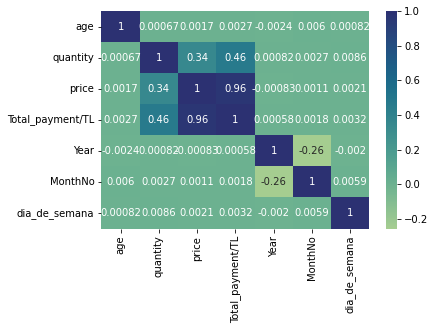

In [538]:
sns.heatmap(data.corr(), annot=True, cmap='crest');


Obviamente o price tem alta correlação com o target(Total_payment/tl), já que ela é um produto dela

#### Treinando as variáveis:

In [539]:
pagamento = pd.get_dummies(data['payment_method'],drop_first=False)
data['Cash'] = pagamento['Cash']
data['Credit Card'] = pagamento['Credit Card']
data['Debit Card'] = pagamento['Debit Card']
data = data.drop(columns=['payment_method'])

In [540]:
categoria = pd.get_dummies(data['category'],drop_first=False)
data['Books'] = categoria['Books']
data['Clothing'] = categoria['Clothing']
data['Cosmetics'] = categoria['Cosmetics']
data['Food & Beverage'] = categoria['Food & Beverage']
data['Shoes'] = categoria['Shoes']
data['Souvenir'] = categoria['Souvenir']
data['Technology'] = categoria['Technology']
data['Toys'] = categoria['Toys']
data = data.drop(columns=['category'])

In [541]:
shopping = pd.get_dummies(data['shopping_mall'],drop_first=False)
data['Cevahir AVM'] = shopping['Cevahir AVM']
data['Emaar Square Mall'] = shopping['Emaar Square Mall']
data['Forum Istanbul'] = shopping['Forum Istanbul']
data['Istinye Park'] = shopping['Istinye Park']
data['Kanyon'] = shopping['Kanyon']
data['Mall of Istanbul'] = shopping['Mall of Istanbul']
data['Metrocity'] = shopping['Metrocity']
data['Metropol AVM'] = shopping['Metropol AVM']
data['Viaport Outlet'] = shopping['Viaport Outlet']
data['Zorlu Center'] = shopping['Zorlu Center']
data = data.drop(columns=['shopping_mall'])

Vamos dropar algumas colunas que sabemos que não fazem diferença para nossa análise:


Como já analisamos os meses e dias, irei dropa-los já que temos eles comos númerais. Além disso também notamos que a diferença entre dias não é muito importante para o contexto

In [542]:
data.drop(columns = ['Day'], inplace=True)
data.drop(columns = ['Month'], inplace=True)

In [543]:

data.drop(columns = ['customer_id'], inplace=True)
data.drop(columns = ['price'], inplace=True)
data.drop(columns = ['invoice_date'], inplace=True)
data.drop(columns = ['gender'], inplace=True)
data.drop(columns = ['age'], inplace=True)
data.drop(columns = ['invoice_no'], inplace=True)

In [544]:
age_group = pd.get_dummies(data['age_group'],drop_first=False)
data['18-30'] = age_group['18-30']
data['31-42'] = age_group['31-42']
data['43-55'] = age_group['43-55']
data['55+'] = age_group['55+']
data.drop(columns = ['age_group'], inplace=True)

Agora que dropamos todos os valores que não faziam diferença como gênero que o ticket médio era parecido com os dois, e transformamos as variáveis que precisavam em dummies, podemos utilizar um algoritmo como o Random Forest para tentar prever o Total_payment do usuário.

In [545]:
data.columns

Index(['quantity', 'Total_payment/TL', 'Year', 'MonthNo', 'dia_de_semana',
       'Cash', 'Credit Card', 'Debit Card', 'Books', 'Clothing', 'Cosmetics',
       'Food & Beverage', 'Shoes', 'Souvenir', 'Technology', 'Toys',
       'Cevahir AVM', 'Emaar Square Mall', 'Forum Istanbul', 'Istinye Park',
       'Kanyon', 'Mall of Istanbul', 'Metrocity', 'Metropol AVM',
       'Viaport Outlet', 'Zorlu Center', '18-30', '31-42', '43-55', '55+'],
      dtype='object')

In [546]:
X = data.drop(columns=['Total_payment/TL']).copy().values
y = data['Total_payment/TL'].copy().values
data.select_dtypes('category')

""
0
1
2
3
4
...
99452
99453
99454
99455


In [547]:
from sklearn.ensemble import RandomForestRegressor


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

rf = RandomForestRegressor()
random_forest = rf.fit(X_train,y_train)
random_forest

RandomForestRegressor()

In [548]:
y_pred = random_forest.predict(X_test)

RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

1.7110511193530938e-11

In [549]:
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 1.0
MAE 8.226138094093648e-12


In [550]:
R2_score_rf = r2_score(y_test, y_pred)
print('r2 score:', R2_score_rf) 

r2 score: 1.0


A primeira opção que temos é utilizar o Random Forest para prever o valor total que cada usuário gastou, entretanto parece que o nosso modelo não está muito bom, já que o nosso r2 está com o melhor valor possível, isso pode significar um overfitting, o que diz que nosso modelo talvez não consigo prever novas compras, se tornando inútil para o nosso contexto.

Vamos utilizar uma decision tree para ser nosso modelo

In [551]:
from sklearn.tree import DecisionTreeRegressor


Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.1, random_state=42, shuffle=True)

dtr=DecisionTreeRegressor(max_depth=8)
dtr.fit(Xtrain, ytrain)
dtr_pred=dtr.predict(Xtest)

In [552]:
print('R2 score',r2_score(ytest,dtr_pred))
print('MAE',mean_absolute_error(ytest,dtr_pred))

R2 score 0.9999911748251882
MAE 4.515987759957675


### Conclusão:

Acreditamos que o nosso modelo pode ser um bom meio da empresa conhecer mais sobre o comportamento de nossos clientes e que possibilitará empresas de marketing a fazerem campanhas mais eficientes para cada tipo de cliente, entretanto, os modelos possivelmente ter acontecido um overfitting seja um problema para prever futuramente os gastos que cada cliente fará. Além disso foi possível observar informações bem interessantes durante a análise exploratória, como que mesmo que as mulheres comprem mais vezes em shopping, os homens gastam em média o mesmo valor que elas.